In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split

In [15]:
# make up data 
np.random.seed(42)

sample_size = 500

years_of_experience = np.random.randint(2,21, size=sample_size)

slope = (200_000 - 60_000) / 18
intercept = 60_000

salaries = slope * years_of_experience + intercept + np.random.normal(0, 10_000, sample_size)

data = {"years_of_experience":years_of_experience, "salaries": salaries}

df = pd.DataFrame(data)


In [28]:
df.head(10)

,years_of_experience,salaries
0,8,115037.780010
1,16,182309.972927
2,12,156442.408989
3,9,144753.562169
4,8,130798.818454
5,20,213956.170256
6,12,153143.171254
7,12,143308.039687
8,5,98703.757529
9,9,127113.413611


In [16]:
df.describe()

,years_of_experience,salaries
count,500.000000,500.000000
mean,10.616000,142570.011096
std,5.662922,44935.263058
min,2.000000,54881.134555
25%,5.750000,104426.300731
50%,10.000000,139865.032545
75%,16.000000,182341.125962
max,20.000000,241879.376204


Text(0.5, 1.0, 'Linear Regression')

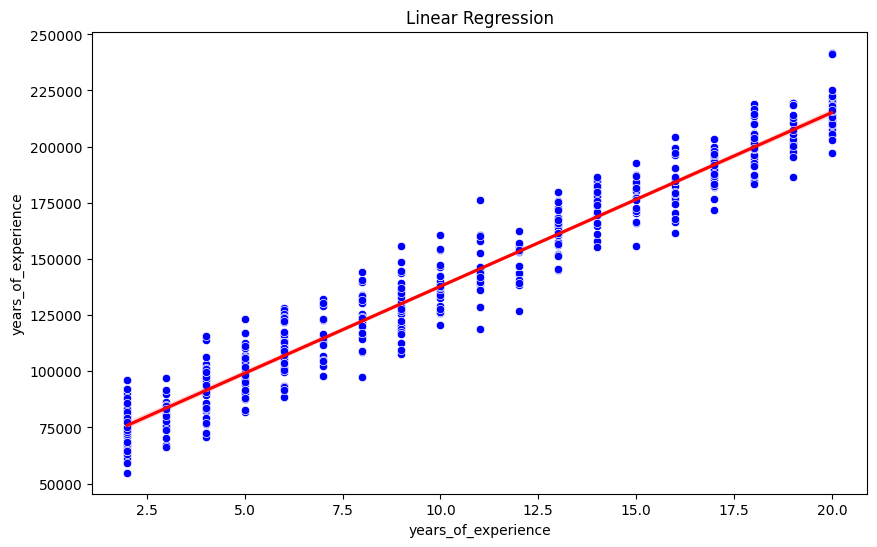

In [27]:
# Plot the data
plt.figure(figsize=(10,6))

sns.scatterplot(x=years_of_experience, y = salaries, data=df, color="blue")
sns.regplot(x=years_of_experience, y = salaries, data=df, color="red", scatter=False)

plt.xlabel("years_of_experience")
plt.ylabel("years_of_experience")
plt.title("Linear Regression")

In [34]:
# split
X = df.iloc[:, 0].to_frame()
y = df.iloc[:, 1]

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [36]:
#  make the model
lr = LinearRegression()

In [37]:
lr.fit(X_train, y_train)

LinearRegression()

In [38]:
lr.score(X_train, y_train)

0.9488372177019488

In [39]:
lr.score(X_test, y_test)

0.9573704756930143

In [40]:
y_pred = lr.predict(X_test)

In [41]:
mean_absolute_error(y_test, y_pred)

7905.114728709234

In [42]:
mean_squared_error(y_test, y_pred)

93933277.37947096

In [43]:
r2_score(y_test, y_pred)

0.9573704756930143

In [44]:
lr.coef_

array([7696.61292305])

In [45]:
lr.intercept_

60961.340880280506

In [57]:
coeficient = lr.coef_
intercept = lr.intercept_

X = np.linspace(0,21, 100)
y = coeficient * X + intercept


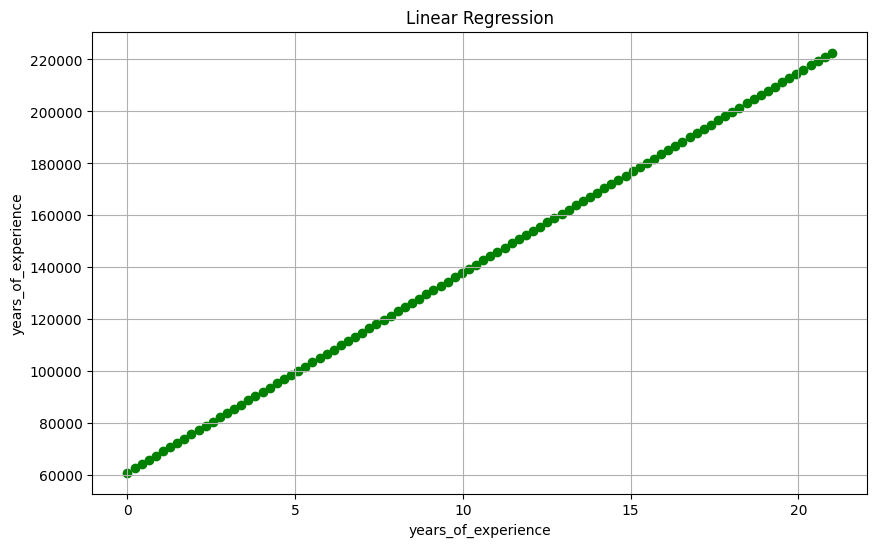

In [58]:
#  plot reg model
plt.figure(figsize=(10,6))
plt.scatter(X, y, c="g", label=f'y = {coeficient}x + {intercept}')
plt.xlabel("years_of_experience")
plt.ylabel("years_of_experience")
plt.title("Linear Regression")

plt.grid()
plt.show()